In [5]:
#Feature Reduction and Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load the MNIST dataset
mnist_train = fetch_openml('mnist_784', version=1, data_home="./data", return_X_y=True)
X_train, y_train = mnist_train

# Convert the features to float and scale them to [0, 1]
X_train = X_train.astype('float32') / 255.0

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

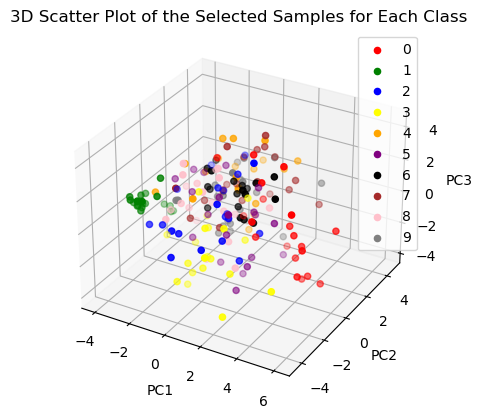

In [6]:
# Visualize the 3D scatter plot of the selected samples for each class
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink', 'gray']
num_samples = 20
samples = []
for digit in range(10):
    indices = np.where(y_train == str(digit))[0]
    indices = np.random.choice(indices, size=num_samples, replace=False)
    samples.append(X_train_pca[indices])
samples = np.concatenate(samples)
for i in range(10):
    ax.scatter(samples[i*num_samples:(i+1)*num_samples, 0], 
               samples[i*num_samples:(i+1)*num_samples, 1], 
               samples[i*num_samples:(i+1)*num_samples, 2], 
               c=colors[i], label=str(i))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('3D Scatter Plot of the Selected Samples for Each Class')
plt.show()

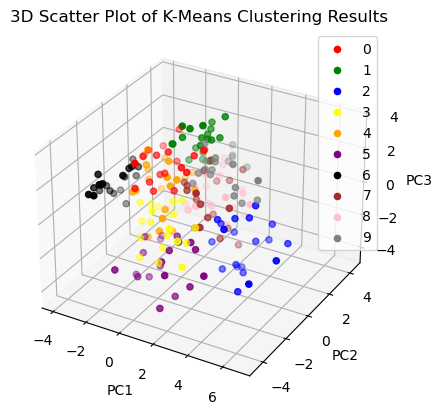

In [7]:
# Fit the K-Means model to the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train_pca)

# Visualize the clustering results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink', 'gray']
for i in range(10):
    indices = np.where(kmeans.labels_ == i)[0][:num_samples]
    ax.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], X_train_pca[indices, 2], c=colors[i], label=str(i))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('3D Scatter Plot of K-Means Clustering Results')
plt.show()


In [8]:
#Multi-class Classification by Ridge Classification
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix

# Load MNIST dataset
mnist_test = fetch_openml('mnist_784', version=1, data_home="./data", return_X_y=True)
X_test, y_test = mnist_test

# Apply PCA to reduce dimension to 100
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train RidgeClassifier on reduced-dimension training data
clf = RidgeClassifier(alpha=1.0)
clf.fit(X_train_pca, y_train)

# Test on reduced-dimension test data
y_pred = clf.predict(X_test_pca)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[6292    2   62   56   14   32   97    4  336    8]
 [   0 6833   41   46    4    0   18   10  914   11]
 [  61   96 5595  183   66    2  161   66  715   45]
 [  12   29  217 5951   12   19   77   72  636  116]
 [   6   56  108   25 5030    5   63    2  872  657]
 [ 105   46   77  929   60 2349  209   57 2257  224]
 [  59   30   93   10   38   47 6257    0  341    1]
 [  63  125   73  156   83    1   12 5861  293  626]
 [  28   83   56  165   18   13   40    7 6327   88]
 [  53   12   59  114  140    6    5  125  605 5839]]


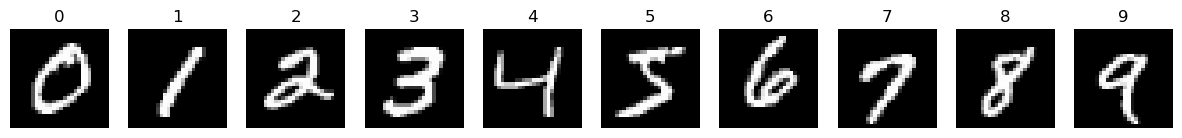

In [10]:
#Convolutional Neural Network
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=None, download=True)

# Define the classes
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Create a figure with 10 subplots
fig, axs = plt.subplots(1, 10, figsize=(15, 5))

# Plot one image from each class
for i in range(10):
    # Find the first image of the current class
    index = next(j for j, (x, y) in enumerate(train_dataset) if y == i)
    img = train_dataset[index][0]
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(classes[i])

plt.show()

Epoch [1/10], Loss: 0.2886, Accuracy: 91.13%
Epoch [2/10], Loss: 0.0886, Accuracy: 97.27%
Epoch [3/10], Loss: 0.0606, Accuracy: 98.07%
Epoch [4/10], Loss: 0.0457, Accuracy: 98.54%
Epoch [5/10], Loss: 0.0373, Accuracy: 98.84%
Epoch [6/10], Loss: 0.0297, Accuracy: 99.06%
Epoch [7/10], Loss: 0.0253, Accuracy: 99.20%
Epoch [8/10], Loss: 0.0220, Accuracy: 99.30%
Epoch [9/10], Loss: 0.0184, Accuracy: 99.40%
Epoch [10/10], Loss: 0.0156, Accuracy: 99.49%


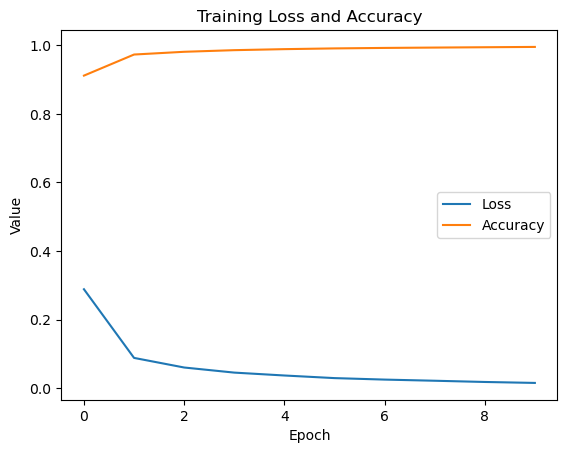

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 16 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the training parameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Instantiate the CNN model and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_loss = []
train_accuracy = []
total_step = len(train_loader)

for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        running_corrects += torch.sum(predicted == labels.data)
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_corrects / len(train_loader.dataset)
    train_loss.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch+1, num_epochs, epoch_loss, epoch_accuracy*100))

# Plot the training accuracy and loss dynamics against the epochs
plt.plot(train_loss, label='Loss')
plt.plot(train_accuracy, label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    return accuracy

In [19]:
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)
test_acc = test(model, test_loader)
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 98.6300
